# Analysing COVID-19 Data along with socio-economic factors (Group- Y)

In [1]:
#Section -1 Importing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
import datetime


from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf #cufflinks to link plotly to pandas
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Covid-19 Data Sources for Project

The data is being made available by Johns Hopkins University in [this GitHub repository](https://github.com/CSSEGISandData/COVID-19). We're interestd in the global confirmed cases, global death cases and global recovered cases dataset. 


In [2]:
#Loading the data for global confirmed cases
covid_data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_case = pd.read_csv(covid_data_url)

#Loading the data for global death cases
covid_death_url= 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid_death = pd.read_csv(covid_death_url)

#Loading the data for global recovered cases
covid_recovered_url= 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
covid_recoveries = pd.read_csv(covid_recovered_url)

#Loading the gdp data
gdp = pd.read_csv("data/gdp_2018_worldbank.csv", encoding='cp1252', header=None)

#load cdr data
cdr= pd.read_csv("data\cdr_per1000_2018_worldbank.csv", encoding= 'unicode_escape', header=None)

#importing age dataset
elderly= pd.read_csv("data\elderly_rate_2018_worldbank.csv", encoding= 'unicode_escape', header=None)

#importing literacy dataset
literacy= pd.read_csv("data\data_pop_literacy2020.csv", encoding= 'unicode_escape', header=None)

#importing population dataset
pop= pd.read_csv("data\data_pop_2018_worldbank.csv", encoding= 'unicode_escape', header = None)


covid_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,5,5,5,5,5,6,7,7,7,7,7,8,8,8,8,8,8,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12
262,NaN,Yemen,15.552727,

In [3]:
#setting header name for gdp, cdr, elderly, literacy and population data

gdp = gdp.rename(columns={0:'Country', 1:'Gdp_2018'})
gdp2 = gdp.drop(0)

elderly = elderly.rename(columns={0:'Country', 1:'eld_rate'})
elderly2 = elderly.drop(0)

literacy_last_column = literacy.columns[-1]
literacy = literacy.rename(columns={0:'Country', 1:'literacy_rate'})
literacy2 = literacy.drop(0)
literacy3 = literacy2.drop(columns={2})

cdr = cdr.rename(columns={0:'Country', 1:'cdr_2018_per1000'})
cdr2 = cdr.drop(0)

#cleaning population data and setting header name
p=pop.drop(columns={2})
popu = p.rename(columns={0:'Country', 1:'Population_2018'})
population = popu.drop(0)

In [4]:
covid_case.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92


In [5]:
#selecting the country Australia 
covid_aus=covid_case[covid_case["Country/Region"]== 'Australia']
covid_aus1=covid_aus.loc[:, ['Province/State',covid_aus.columns[-1]]]
covid_aus1=covid_aus1.rename(columns={covid_aus1.columns[-1]:'Cummulative_Cases'})

covid_aus2=covid_recoveries[covid_recoveries["Country/Region"]== 'Australia']
covid_aus3=covid_aus2.loc[:, ['Province/State',covid_aus2.columns[-1]]]
covid_aus3=covid_aus3.rename(columns={covid_aus3.columns[-1]:'Recovered'})
covid_aus3

covid_aus4=covid_death[covid_death["Country/Region"]== 'Australia']
covid_aus5=covid_aus4.loc[:, ['Province/State',covid_aus4.columns[-1]]]
covid_aus5=covid_aus5.rename(columns={covid_aus5.columns[-1]:'Deaths'})
covid_aus5

aus_merged1 = pd.merge(covid_aus1, covid_aus3, on = 'Province/State')
aus_merged2 = pd.merge(aus_merged1, covid_aus5, on = 'Province/State')
aus_merged2.head()

aus_merged2["Active_Cases"] = aus_merged2["Cummulative_Cases"]-aus_merged2["Recovered"]-aus_merged2["Deaths"]
aus_merged2.head()


,Province/State,Cummulative_Cases,Recovered,Deaths,Active_Cases
0,Australian Capital Territory,108,104,3,1
1,New South Wales,3114,2729,48,337
2,Northern Territory,29,29,0,0
3,Queensland,1062,1051,6,5
4,South Australia,440,436,4,0


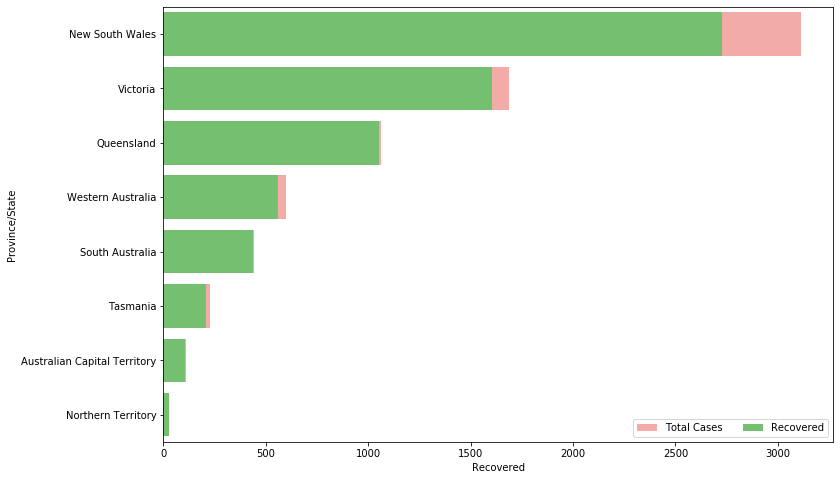

In [6]:
f, ax = plt.subplots(figsize=(12,8))
data = aus_merged2[['Province/State','Cummulative_Cases','Recovered']]
data.sort_values('Cummulative_Cases', ascending=False, inplace=True)

sns.set_color_codes('pastel')
sns.barplot(x='Cummulative_Cases', y='Province/State',data=data,label="Total Cases",color='r')

sns.set_color_codes('muted')
sns.barplot(x='Recovered', y='Province/State',data=data,label="Recovered",color='g')

ax.legend(ncol=2, loc='lower right',frameon=True)


***Intrepretation of the graph***


The above graph represents the total cases and recovered cases of all states of Australia. We can see New South Wales have highest no. of total and recovered cases, followed by Victoria as second whereas Queensland is in third highest. In a similar way, Western Australia, South Australia and Tasmania have few cases nearly about 600 which  recovered in a fast manner whereas Australian Capital Territory and Northern Territory have least cases. 

[Text(0, 0.5, 'Number of Cases'), Text(0.5, 0, 'Australian Provinces')]

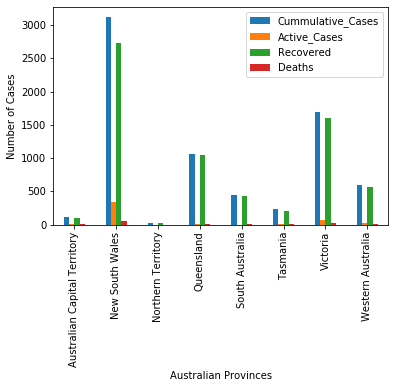

In [7]:
ax=aus_merged2.plot(x="Province/State", y=["Cummulative_Cases", "Active_Cases", "Recovered","Deaths"], kind="bar")
ax.set(xlabel='Australian Provinces', ylabel='Number of Cases')


***Intrepretation of the graph***

The above histogram illustrates the cummulative, active, recovered and death cases of states of Australia.New South Wales have highest cummulative and recovered cases which is followed by Victoria state. Likewise, Queensland and Western Australia have nearly equal cases on all section. Tasmania and South Australia have very few cases whereas australian capital territory and northern territory have least no. of cases.

In [8]:
'Deaths','eld_rate','literacy_rate','cdr_2018_per1000','Gdp_percapita'#groupby 'Country/Region' in covid_case, covid_deaths and covid_recoveries
covid_case = covid_case.groupby('Country/Region').sum()
covid_cases = covid_case.drop(columns=['Lat', 'Long'])

covid_death = covid_death.groupby('Country/Region').sum()
covid_deaths = covid_death.drop(columns=['Lat', 'Long'])

covid_recoveries = covid_recoveries.groupby('Country/Region').sum()
covid_recovered = covid_recoveries.drop(columns=['Lat', 'Long'])

In [9]:
#worldwide
covid_cases_worldwide = covid_cases.transpose()
covid_cases_worldwide['Total_worldwide'] = covid_cases_worldwide.sum(axis = 1)

covid_deaths_worldwide = covid_deaths.transpose()
covid_deaths_worldwide['Total_worldwide'] = covid_deaths_worldwide.sum(axis = 1)

covid_recovered_worldwide = covid_recovered.transpose()
covid_recovered_worldwide['Total_worldwide'] = covid_recovered_worldwide.sum(axis = 1)

covid_deaths_worldwide

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,MS Zaandam,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Total_worldwide
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=covid_cases_worldwide.index, y=covid_cases_worldwide['Total_worldwide'], mode='lines+markers', name="Total Confirmed Cases"))
fig.add_trace(go.Scatter(x=covid_deaths_worldwide.index, y=covid_deaths_worldwide['Total_worldwide'], mode='lines+markers', name="Total Deaths"))
fig.add_trace(go.Scatter(x=covid_recovered_worldwide.index, y=covid_recovered_worldwide['Total_worldwide'], mode='lines+markers', name="Recovered Cases"))
fig.update_layout(
    title={
        'text': "COVID-19 Global Summary",
        'y':0.9,
        'x':0.4},
    xaxis_title="Date",
    yaxis_title="Total Number",
    font=dict(
        family="monospace",
        size=15,
        color="#7a7f7f"
    )
)
fig.show()

***Intrepretation of the graph***

The total covid19 confirmed cases were just 555 on January 22, 2020 and the cases increased gradually till March 19, 2020 to reach 242,632. The number then increased exponentially. The number of total covid19 confirmed cases is 7,009,065 as of June 07, 2020.
The total deaths from covid19 were 362 as of February 02, 2020. Increasing steadily, the cases reached 49685 on April 1, 2020. The cases increased gradually and reached 402,730 on June 07, 2020.
The total number of recovories were 28 on January 22, 2020. It increased gradually till March 20, 2020. Then the recovery cases increased exponentially to reach 3,140,920 on June 07, 2020.


In [11]:
last_column = covid_cases.columns[-1]
top_cases_countries = covid_cases.nlargest(5, [last_column])
top_cases_countries = top_cases_countries.transpose()
top_cases_countries = top_cases_countries.rename_axis("Date")
top_cases_countries.index = pd.to_datetime(top_cases_countries.index)

In [89]:
#creating list of countries with top cases
'''countries = []
for col in top_cases_countries.columns:
    countries.append(col)'''
    
#plot top 5 countries with most cases using pandas plot
'''plot = top_cases_countries.plot(figsize=(12,8), linewidth=1, legend=False)
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Number of Cases')
for country in countries:
    plot.text(x = top_cases_countries.index[-1], y = top_cases_countries[country].max(), s = country, weight = 'bold')'''
    
#plot top 5 countries with most cases using pandas iplot
plot = top_cases_countries.iplot(title="Top 5 Countries with Covid-19 Cases", labels=dict(index="Date", value="Total Number"))

***Intrepretation of the graph***

The above graph represents the 5 countries with the highest number of covid-19 cases are US, Brazil, Russia, United Kingdom and India. As of June 8, 2020, US has 1,960,897 cases followed by Brazil with 707,412 and Russia with 476,043. United Kingdom stands fourth with 288,834 cases while India has 265,928 cases.

In [13]:
#getting top 5 countries with most deaths
top_deaths_countries = covid_deaths.nlargest(5, [last_column])
top_deaths_countries = top_deaths_countries.transpose()
top_deaths_countries = top_deaths_countries.rename_axis("Date")
top_deaths_countries.index = pd.to_datetime(top_deaths_countries.index)

In [90]:
#plot top 5 countries with most death cases
'''death_countries = []
for c in top_deaths_countries.columns:
    death_countries.append(c)
plot = top_deaths_countries.plot(figsize=(12,8), linewidth=1, legend=False)
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Number of Deaths')
for country in death_countries:
    plot.text(x = top_deaths_countries.index[-1], y = top_deaths_countries[country].max(), s = country, weight = 'bold')'''


#plot top 5 countries with most cases using pandas iplot
plot = top_deaths_countries.iplot(title="Top 5 Countries with Covid-19 Death Cases")

***Intrepretation of the graph***

This graph demonstrate the corona confirmed cases based on top 5 countries worldwide. The topmost country till date is US which have nearly 2M cases which is followed by Brazil nearly half million cases. In third highest rank, we can see Russia with 0.5 million cases which is followed by United Kingdom nearly 0.3 million cases. The cases in India is increasing drastically from April 26 to till date nearly equal to United Kingdom.

In [15]:
#creating new table with total cases, total deaths and countries

total_cases_column = covid_cases[last_column]
total_cases = pd.DataFrame(total_cases_column)
total_cases = total_cases.rename(columns={total_cases.columns[0]:"Total_Cases"})

total_deaths_column = covid_death[last_column]
total_deaths = pd.DataFrame(total_deaths_column)
total_deaths = total_deaths.rename(columns={total_deaths.columns[0]:"Deaths"})

#merge death and cases datafame
df = total_cases.join(total_deaths)

#calculate death per cases
df["Death_per_1000_cases"] = (df["Deaths"]/df["Total_Cases"])*1000

#sort in descending order

df = df.sort_values(by=['Death_per_1000_cases'], ascending=False)
#df = df.sort_values(by=['Total_Cases'], ascending=False)

df_1= df[df['Death_per_1000_cases']>50]
df_2=df_1.loc[:, 'Death_per_1000_cases']
df_2.head()

Country/Region
Yemen         225.806452
MS Zaandam    222.222222
Belgium       161.858866
France        152.692185
Italy         144.356888
Name: Death_per_1000_cases, dtype: float64

Text(0, 0.5, 'Death_per_1000_cases')

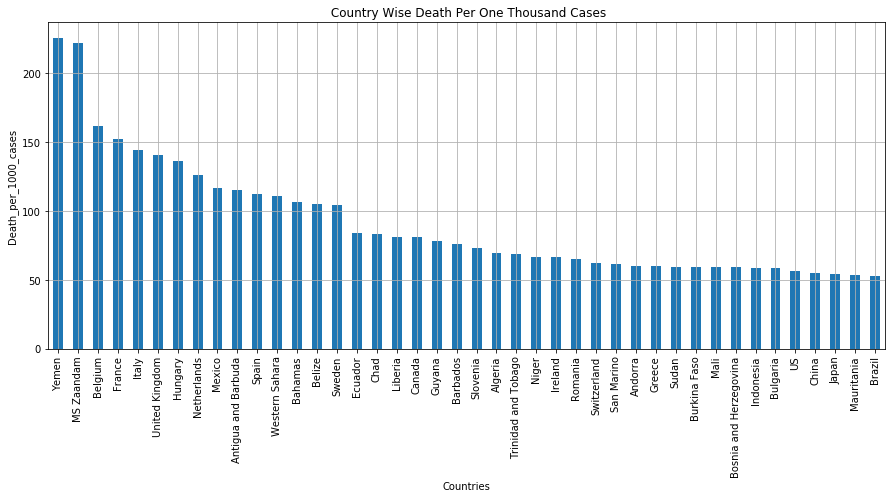

In [16]:
#visualize deaths per cases
plt.figure(figsize=(15,6))
df_2.plot.bar().grid()
plt.title(" Country Wise Death Per One Thousand Cases")
plt.xlabel("Countries")
plt.ylabel("Death_per_1000_cases")

In [17]:
#working with recovered cases
total_recovered = covid_recovered[last_column]
total_recovered = pd.DataFrame(total_recovered)
total_recovered = total_recovered.rename(columns={total_recovered.columns[0]:"Recovered"})

#merge cases, deaths and recovered
countries_summary = total_cases.join([total_recovered, total_deaths])
countries_summary["Active_Cases"] = countries_summary["Total_Cases"]-countries_summary["Recovered"]-countries_summary["Deaths"]
#df2.sort_values(by=['Total_Cases'], ascending=False).style.bar(align = 'left', width = 98)
countries_summary = countries_summary.rename_axis('Country')
countries_summary.head()

,Total_Cases,Recovered,Deaths,Active_Cases
Country,,,,
Afghanistan,20917,2171,369,18377
Albania,1263,945,34,284
Algeria,10265,6799,715,2751
Andorra,852,751,51,50
Angola,92,38,4,50


In [19]:
#Analysing Cases of Nepal
Nep_cases = covid_cases.loc['Nepal']
Nep_cases = pd.DataFrame(Nep_cases)

Nep_recovered = covid_recovered.loc['Nepal']
Nep_recovered = pd.DataFrame(Nep_recovered)

Nep_death = covid_death.loc['Nepal']
Nep_death = pd.DataFrame(Nep_death)

fig = go.Figure()
fig.add_trace(go.Scatter(x=Nep_cases.index, y=Nep_cases['Nepal'], mode='lines+markers', name="Total Confirmed Cases"))
fig.add_trace(go.Scatter(x=Nep_death.index, y=Nep_death['Nepal'], mode='lines+markers', name="Total Death Cases"))
fig.add_trace(go.Scatter(x=Nep_recovered.index, y=Nep_recovered['Nepal'], mode='lines+markers', name="Total Recovered Cases"))
fig.update_layout(
    title={
        'text': "COVID-19 Nepal Summary",
        'y':0.9,
        'x':0.4},
    xaxis_title="Date",
    yaxis_title="Total Number",
    font=dict(
        family="monospace",
        size=15,
        color="#7a7f7f"
    )
)

***Intrepretation of the graph***

The above graph represents the Covid-19 Summary of Nepal including confirmed, recovered and death cases. The cases increases from May 5 to till date with peak value 3762 confirmed cases,488 recovered cases, 14 death cases. We can estimate daily cases from the above graph.

In [20]:
fig = px.choropleth(countries_summary, 
                    locations=countries_summary.index,
                    color = "Total_Cases",
                    locationmode='country names',
                    hover_data=["Total_Cases", "Deaths", "Recovered", "Active_Cases"],
                    range_color=[1,200000],
                    title='Countries with Confirmed Cases')
#fig.update(layout_coloraxis_showscale=False)
fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))

***Intrepretation of the graph***

From the above graph, we can estimate the confirmed cases in various countries like Russia, India, US, China, Brazil, Canada, Australia, Argentina, Brazil, etc. On the right vertical bar, we can see the range from 0 - 200k in which the mentioned countries holds the respected case numbers. The countries like Russia, China, US, Brazil, India,etc have highest no. of cases. Among all, the US in in top 1 having  1.96M total cases, 110990 death cases, 518522 recovered cases, 1331385 active cases followed by Brazil having 707k total cases, 37134 death cases, 378257 recovered cases, 292021 active cases till date. In a similar way, the  countries  below 20k total cases are Australia, Congo, Nigeria, Angola, Namibia, Thailand, Libya, Kenya, Madagascar, etc.

In [21]:
#finding global new cases and its average 
covid_cases_worldwide['NewCase'] = covid_cases_worldwide['Total_worldwide'].diff()
covid_cases_worldwide['Average_NewCase'] = covid_cases_worldwide['Total_worldwide'].diff()/137
covid_cases_worldwide  

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Diamond Princess,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,MS Zaandam,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Total_worldwide,NewCase,Average_NewCase
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,555,NaN,NaN
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,654,99.0,0.722628
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,941,287.0,2.094891
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,1434,493.0,3.598540
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,2118,684.0,4.992701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [22]:
#merge gdp, elderly, literacy, population and cdr 
socio_economic = gdp2.merge(elderly2, on='Country') #merge gdp and elderly
#socio_economic = socio_economic.merge(literacy3, on='Country') #merge gdp, elderly and literacy
socio_economic = socio_economic.merge(cdr2, on='Country') #merge gdp, elderly, literacy and cdr
socio_economic = socio_economic.merge(population, on='Country')
socio_economic = socio_economic.set_index('Country')

In [23]:
#Dropping missing values
socio_economic1=socio_economic.dropna()
socio_economic1.dtypes

Gdp_2018             object
eld_rate             object
cdr_2018_per1000     object
Population_2018     float64
dtype: object

In [24]:
#Converting string(object) data types into float to perform calculations
socio_economic1['Gdp_2018']=socio_economic1['Gdp_2018'].astype(float)
socio_economic1['eld_rate']=socio_economic1['eld_rate'].astype(float)
#socio_economic1['literacy_rate']=socio_economic1['literacy_rate'].astype(float)
socio_economic1['cdr_2018_per1000']=socio_economic1['cdr_2018_per1000'].astype(float)

In [25]:
#Calculating GDP per capita
socio_economic1['Gdp_percapita'] = socio_economic1['Gdp_2018']/socio_economic1['Population_2018']
socio_economic1

,Gdp_2018,eld_rate,cdr_2018_per1000,Population_2018,Gdp_percapita
Country,,,,,
Afghanistan,1.936297e+10,2.584927,6.42300,37172386.0,520.896603
Angola,1.057510e+11,2.216374,8.19000,30809762.0,3432.385736
Albania,1.510250e+10,13.744736,7.89800,2866376.0,5268.848503
Arab World,2.774315e+12,4.557876,5.38036,419790588.0,6608.806978
United Arab Emirates,4.141789e+11,1.085001,1.47000,9630959.0,43004.953358
...,...,...,...,...,...
Samoa,8.204918e+08,4.800412,5.23900,196130.0,4183.407935
"Yemen, Rep.",2.691440e+10,2.876270,5.98300,28498687.0,944.408499
South Africa,3.682890e+11,5.318005,9.43500,57779622.0,6374.029238


In [93]:
#Merging two data frames
merged = pd.merge(countries_summary, socio_economic1, on = 'Country')
merged.head()

,Total_Cases,Recovered,Deaths,Active_Cases,Gdp_2018,eld_rate,cdr_2018_per1000,Population_2018,Gdp_percapita
Country,,,,,,,,,
Afghanistan,20917,2171,369,18377,1.936297e+10,2.584927,6.423,37172386.0,520.896603
Albania,1263,945,34,284,1.510250e+10,13.744736,7.898,2866376.0,5268.848503
Algeria,10265,6799,715,2751,1.737580e+11,6.362497,4.716,42228429.0,4114.716179
Angola,92,38,4,50,1.057510e+11,2.216374,8.190,30809762.0,3432.385736
Antigua and Barbuda,26,20,3,3,1.610574e+09,8.799826,6.366,96286.0,16726.980807


For the model assessment purpose, following variables are categorized as dependent and independent variables for each model.
Independent variable are: Socioeconomic data such as Elderly Rate, Crude Death Rate, GDP.
Dependent variable: Total Confirmed Cases, Total Recovered Cases, Death Cases.
To explore the relationship between these variables, scatter plot is generated

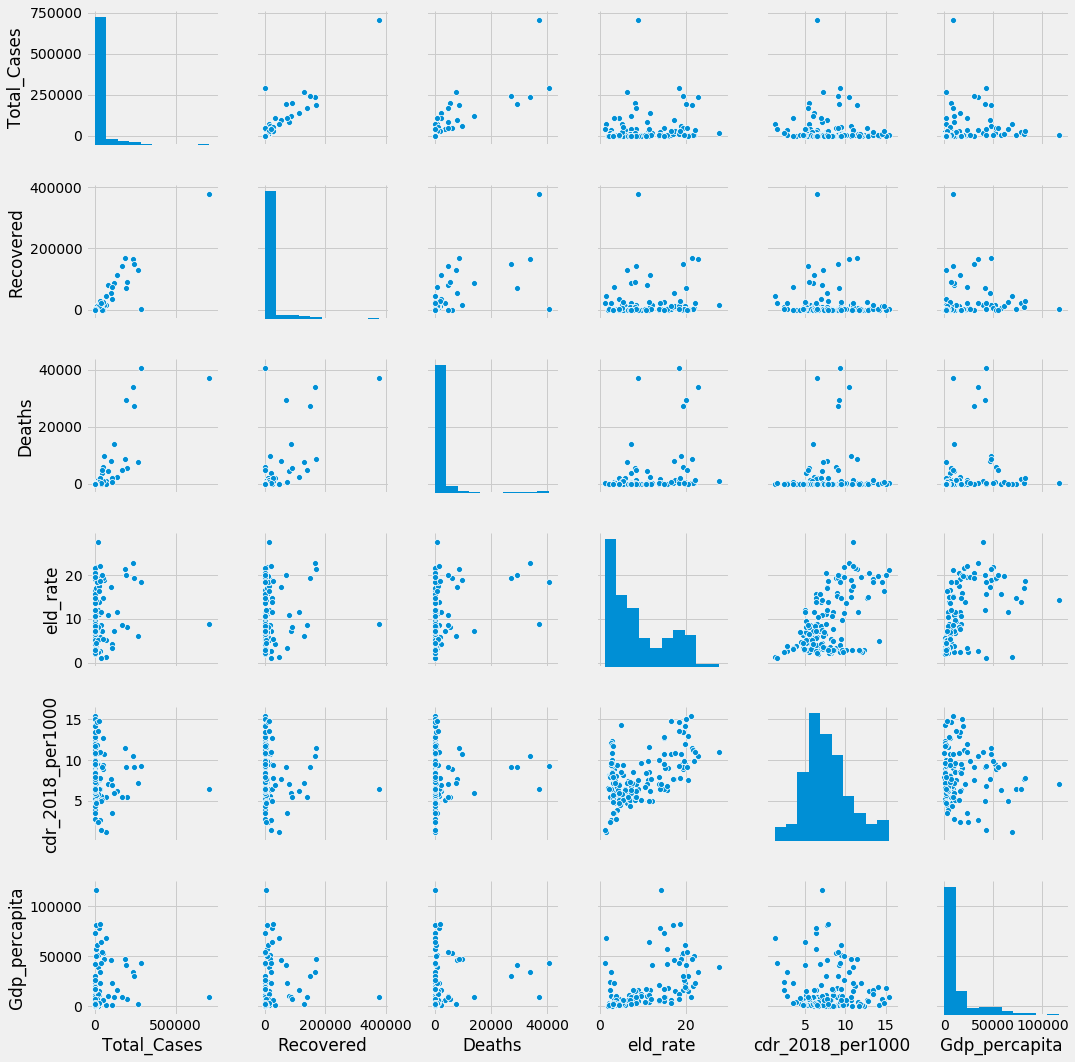

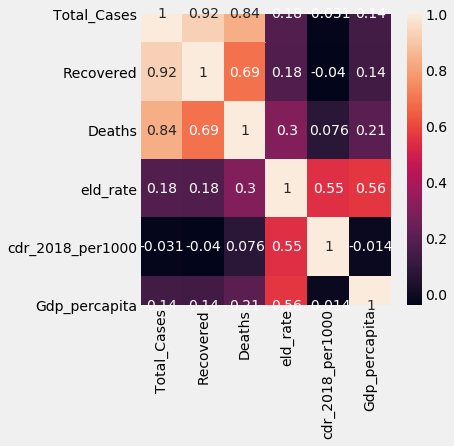

In [95]:
#Selecting columns with dependent and independent variables for further analysis
merged_1=merged.loc[:, ['Total_Cases','Recovered','Deaths','eld_rate','cdr_2018_per1000','Gdp_percapita',]]

#Generating pairplot to check if the dependent and independent variables have linear realtionship
sns.pairplot(merged_1)

#Generating heatmap
plt.figure(figsize=(5,5))
sns.heatmap(merged_1.corr(), annot=True)

Overall, it can be seen that there is no linerar relation between dependent and independent variable. For this reason linear regression cannot be used for further analysis.

We now classify the dependent variable model.

## Model Specification 

### Model Specification for Confirmed Cases

In [96]:
# Modelling Section
#Categorize countries in 3 categories in terms of total number of confirmed cases (<1k, >10k, 1k-10k,) 
merged['total_case_cat'] = '<1k'
merged.loc[(merged['Total_Cases'] >= 1000) & (merged['Total_Cases'] <=10000), 'total_case_cat'] = '1k-10k'
merged.loc[(merged['Total_Cases'] > 10000) , 'total_case_cat'] = '>10k'
merged.head()

,Total_Cases,Recovered,Deaths,Active_Cases,Gdp_2018,eld_rate,cdr_2018_per1000,Population_2018,Gdp_percapita,total_case_cat
Country,,,,,,,,,,
Afghanistan,20917,2171,369,18377,1.936297e+10,2.584927,6.423,37172386.0,520.896603,>10k
Albania,1263,945,34,284,1.510250e+10,13.744736,7.898,2866376.0,5268.848503,1k-10k
Algeria,10265,6799,715,2751,1.737580e+11,6.362497,4.716,42228429.0,4114.716179,>10k
Angola,92,38,4,50,1.057510e+11,2.216374,8.190,30809762.0,3432.385736,<1k
Antigua and Barbuda,26,20,3,3,1.610574e+09,8.799826,6.366,96286.0,16726.980807,<1k


In [99]:
#selecting 'cases' columns and columns with socioeconomic data 
data_lr=merged.loc[:, ['total_case_cat','eld_rate','cdr_2018_per1000','Gdp_percapita',]]
data_lr.head()

,total_case_cat,eld_rate,cdr_2018_per1000,Gdp_percapita
Country,,,,
Afghanistan,>10k,2.584927,6.423,520.896603
Albania,1k-10k,13.744736,7.898,5268.848503
Algeria,>10k,6.362497,4.716,4114.716179
Angola,<1k,2.216374,8.190,3432.385736
Antigua and Barbuda,<1k,8.799826,6.366,16726.980807


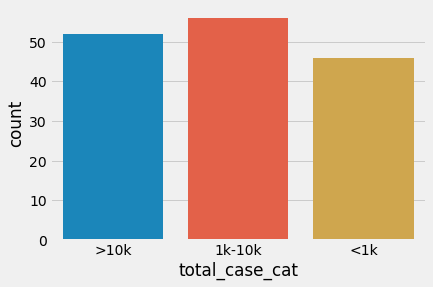

In [100]:
#generating bar plot for total cases
sns.countplot(data_lr['total_case_cat'], label='Count')

We see, there are nearly 60 countries with 1k to 10k cases, above 50 countries with >10K, and 46 countries with less than 1k cases. 

#### MLR  Model for confirmed cases

In [101]:
#Dividing data into training and testing sets
X_train_case, X_test_case, y_train_case, y_test_case = train_test_split(data_lr.drop(['total_case_cat'], axis=1), data_lr['total_case_cat'], stratify=data_lr['total_case_cat'], random_state=12)

In [102]:
# Model Fitting 
lr_case=LogisticRegression().fit(X_train_case,y_train_case)
y_pred_train_case = lr_case.predict(X_train_case)
y_pred_test_case = lr_case.predict(X_test_case)

In [103]:
#Evaluation fot Training Model
print("Classification report: \n", classification_report(y_train_case, y_pred_train_case))

Classification report: 
               precision    recall  f1-score   support

      1k-10k       0.45      0.40      0.43        42
         <1k       0.52      0.68      0.59        34
        >10k       0.64      0.54      0.58        39

    accuracy                           0.53       115
   macro avg       0.54      0.54      0.53       115
weighted avg       0.53      0.53      0.53       115



The highest precision is for '>10k' with a number of 0.64 followed by '<1k' with 0.52 and '1k-10k' with  0.45. This means the classification of '>10k' category is better than that of other 2 categories.

In [104]:
#Evaluation fot Testing Model
print("Classification report: \n", classification_report(y_test_case, y_pred_test_case))

Classification report: 
               precision    recall  f1-score   support

      1k-10k       0.30      0.43      0.35        14
         <1k       0.21      0.25      0.23        12
        >10k       0.80      0.31      0.44        13

    accuracy                           0.33        39
   macro avg       0.44      0.33      0.34        39
weighted avg       0.44      0.33      0.35        39



The highest precision is for '>10k' with a number of 0.80 followed by '1k-10k' with 0.3 and '<1k' with 0.21. Our model classified properly for '>10k' category is better than that of other 2 categories.

The accuracy score for testing data is 0.33 while it's 0.53 for training data. The difference between the accuracy scores suggest that the model overfitted.

#### MNB Classifier for total confirmed cases ###

In [105]:
from sklearn.naive_bayes import MultinomialNB
clf_mnb=MultinomialNB()

In [107]:
#Evaluation fot Training Model
clf_mnb.fit(X_train_case,y_train_case)
y_pred_train_case2 = clf_mnb.predict(X_train_case)
print("Classification report of training dataset: \n", classification_report(y_train_case, y_pred_train_case2))

Classification report of training dataset: 
               precision    recall  f1-score   support

      1k-10k       0.36      0.19      0.25        42
         <1k       0.41      0.79      0.54        34
        >10k       0.70      0.49      0.58        39

    accuracy                           0.47       115
   macro avg       0.49      0.49      0.46       115
weighted avg       0.49      0.47      0.45       115



The MNB classifier classified the category of '>10k' better than that for other 2 categories. The accuracy score if 0.58.

In [109]:
#Evaluation fot Testing Model
y_pred_test_case2 = clf_mnb.predict(X_test_case)
print("Classification report of testing dataset: \n", classification_report(y_test_case, y_pred_test_case2))

Classification report of testing dataset: 
               precision    recall  f1-score   support

      1k-10k       0.10      0.07      0.08        14
         <1k       0.29      0.58      0.39        12
        >10k       0.80      0.31      0.44        13

    accuracy                           0.31        39
   macro avg       0.40      0.32      0.31        39
weighted avg       0.39      0.31      0.30        39



The MNB classifier classified the category of '>10k' better than that for other 2 categories. The accuracy score if 0.31. From the difference between the accuracy scores of training and testing data, it can be infered that the MNB model overfitted.

#### Decision Tree Classifier Model for Confirmed Cases

In [112]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# Data pre-processing and preparation
# Firstly, we need to convert the data from being categorical to being numerical
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
enc_X = OrdinalEncoder()
enc_y = LabelEncoder()

# The first attribute is the target, while the rest attributes are the features
X = data_lr[['eld_rate','cdr_2018_per1000','Gdp_percapita']]
y = enc_y.fit_transform(data_lr['total_case_cat'])

#selecting test train set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, random_state=42, test_size=0.3)

In [113]:
#DT Classifier model fitting
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

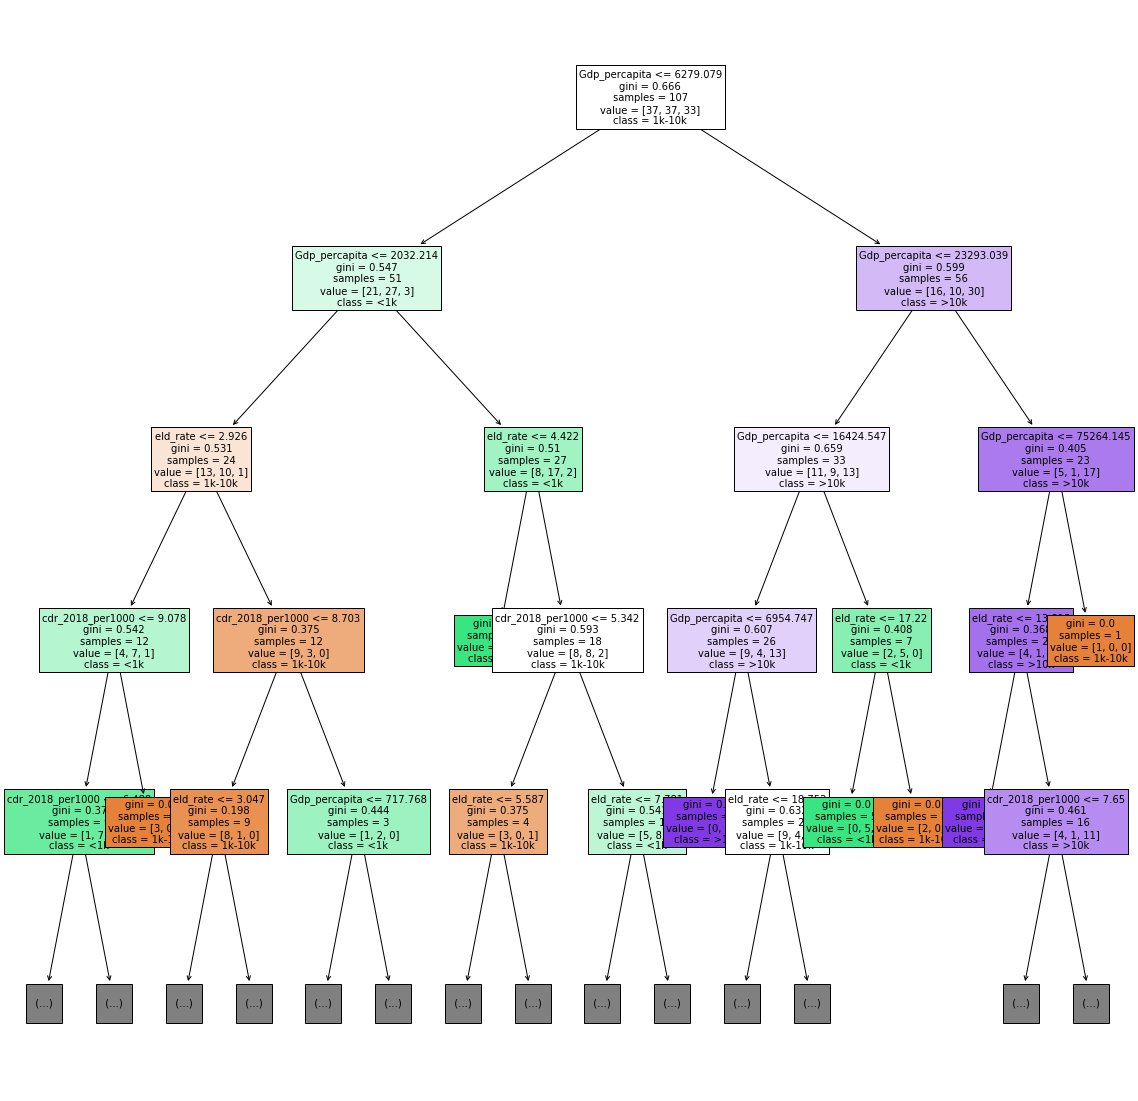

In [42]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf_dt, max_depth=4, filled=True, fontsize=10, 
               feature_names=data_lr.columns[1:], class_names=enc_y.classes_)
plt.show()

In [114]:
# Evaluate the trained model with the testing data
y_pred_test_dt = clf_dt.predict(X_test_dt)
print("Classification report of testing dataset: \n", classification_report(y_pred_test_dt, y_test_dt))

Classification report of testing dataset: 
               precision    recall  f1-score   support

           0       0.68      0.52      0.59        25
           1       0.33      0.20      0.25        15
           2       0.32      0.86      0.46         7

    accuracy                           0.47        47
   macro avg       0.44      0.53      0.43        47
weighted avg       0.52      0.47      0.46        47



The decision tree classified '0' category correctly than for other categories.

### Model Specification for Recovered Case

**MLR Model for Recovered cases**

In [118]:
#adding recovered_cat in the dataframe
merged['recovered_cat'] = '<1k'
merged.loc[(merged['Recovered'] >= 1000) & (merged['Recovered'] <=10000), 'recovered_cat'] = '1k-10k'
merged.loc[(merged['Recovered'] > 10000) , 'recovered_cat'] = '>10k'

recovered_lr = merged[['recovered_cat','eld_rate','cdr_2018_per1000','Gdp_percapita']]
recovered_lr.head()

,recovered_cat,eld_rate,cdr_2018_per1000,Gdp_percapita
Country,,,,
Afghanistan,1k-10k,2.584927,6.423,520.896603
Albania,<1k,13.744736,7.898,5268.848503
Algeria,1k-10k,6.362497,4.716,4114.716179
Angola,<1k,2.216374,8.190,3432.385736
Antigua and Barbuda,<1k,8.799826,6.366,16726.980807


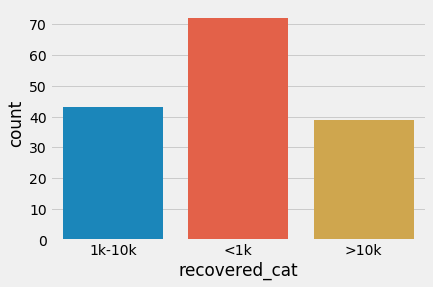

In [120]:
sns.countplot(recovered_lr['recovered_cat'], label='Count')

There are higher number of countries with less than 1000 recovered cases than countries with '1K-10K' and '>10k' categories.

In [121]:
#Dividing data into training and testing sets
X = recovered_lr[['eld_rate', 'cdr_2018_per1000', 'Gdp_percapita']]
X_train_rec, X_test_rec, y_train_rec, y_test_rec = train_test_split(X, recovered_lr['recovered_cat'], stratify=recovered_lr['recovered_cat'], random_state=12)

# Model Fitting 
lr2=LogisticRegression().fit(X_train_rec,y_train_rec)

#predicted train and test
y_pred_train_rec = lr2.predict(X_train_rec)
y_pred_test_rec = lr2.predict(X_test_rec)

#Evaluation fot Test set

print("Classification report of testing dataset: \n", classification_report(y_test_rec, y_pred_test_rec))

Classification report of testing dataset: 
               precision    recall  f1-score   support

      1k-10k       0.67      0.36      0.47        11
         <1k       0.61      0.78      0.68        18
        >10k       0.60      0.60      0.60        10

    accuracy                           0.62        39
   macro avg       0.63      0.58      0.58        39
weighted avg       0.62      0.62      0.60        39



In the testing dataset, the logistic regression classified countries with one thousand to ten thousand recovered cases correctly compared to other categories.

In [123]:
#Evaluation for Training set
print("Classification report for training dataset: \n", classification_report(y_train_rec, y_pred_train_rec))

Classification report for training dataset: 
               precision    recall  f1-score   support

      1k-10k       0.50      0.12      0.20        32
         <1k       0.60      0.89      0.72        54
        >10k       0.56      0.52      0.54        29

    accuracy                           0.58       115
   macro avg       0.55      0.51      0.48       115
weighted avg       0.56      0.58      0.53       115



The regression classified countries with less than thousand recovered cases correctly fir training set compared to other categories. The accuracy score for training and testing dataset are 0.58 and 0.62 respectively. Our model is not overfitting and is good enough to run in unseen data.

#### MNB classifier for Recovered cases

In [125]:
#Evaluation fot Training Model
mnb2 = clf_mnb.fit(X_train_rec,y_train_rec)

#predicted train and test
y_pred_train_rec = mnb2.predict(X_train_rec)
y_pred_test_rec = mnb2.predict(X_test_rec)

#Evaluation fot Test set
print("Classification report: \n", classification_report(y_test_rec, y_pred_test_rec))

Classification report: 
               precision    recall  f1-score   support

      1k-10k       0.25      0.18      0.21        11
         <1k       0.54      0.72      0.62        18
        >10k       0.71      0.50      0.59        10

    accuracy                           0.51        39
   macro avg       0.50      0.47      0.47        39
weighted avg       0.50      0.51      0.50        39



Inferpreting the classification report, our classifier classified countries with more than 10 thousand recovered cases correctly in training dataset.

In [127]:
#Evaluation fot Training set
print("Classification report: \n", classification_report(y_train_rec, y_pred_train_rec))

Classification report: 
               precision    recall  f1-score   support

      1k-10k       0.29      0.12      0.17        32
         <1k       0.56      0.80      0.66        54
        >10k       0.58      0.48      0.53        29

    accuracy                           0.53       115
   macro avg       0.48      0.47      0.45       115
weighted avg       0.49      0.53      0.49       115



MNB classifier classified countries with more than 10 thousand recovered cases correctly in testing dataset. The accuracy score for training and testing data are 0.53 and 0.51 respectively. This suggests that our model is not overfitted.

#### Decision Tree Classifier for Recovered cases

In [50]:
#DT Classifier model fitting
clf_dt_rec = DecisionTreeClassifier(random_state=42)
clf_dt_rec.fit(X_train_rec, y_train_rec)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

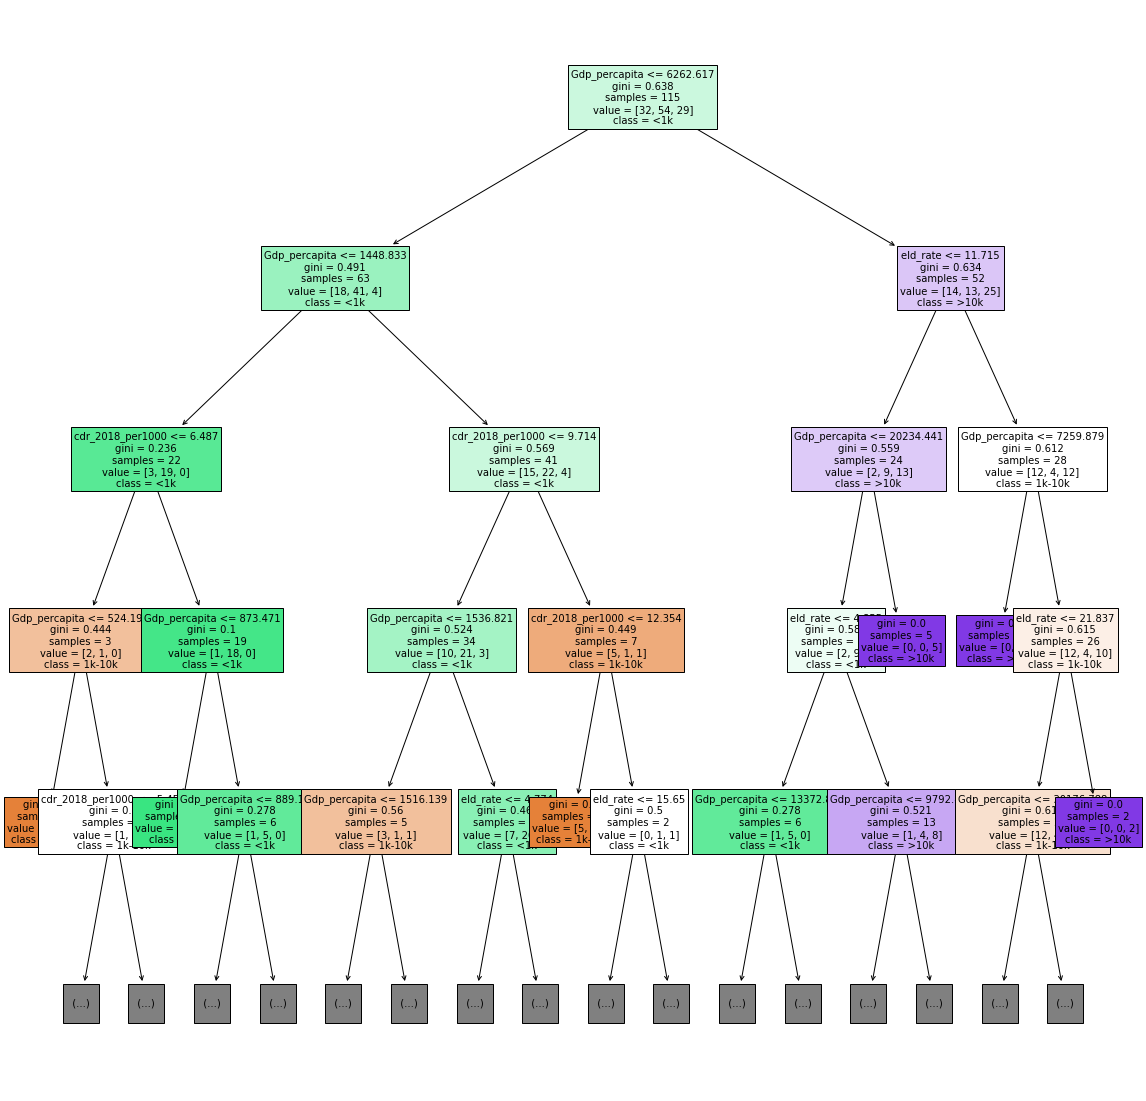

In [51]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf_dt_rec, max_depth=4, filled=True, fontsize=10, 
               feature_names=recovered_lr.columns[1:], class_names=enc_y.classes_)
plt.show()

In [115]:
# Evaluate the trained model with the testing data
y_pred_test_dt_rec = clf_dt_rec.predict(X_test_rec)
print("Classification report of testing dataset: \n", classification_report(y_pred_test_dt_rec, y_test_rec))

Classification report of testing dataset: 
               precision    recall  f1-score   support

      1k-10k       0.73      0.53      0.62        15
         <1k       0.39      0.70      0.50        10
        >10k       0.60      0.43      0.50        14

    accuracy                           0.54        39
   macro avg       0.57      0.55      0.54        39
weighted avg       0.59      0.54      0.54        39



The decision tree classified '>10k' category correctly than for '1k-10k' and '<1k' categories.

### Model For Total Death Cases

**MLR for Total Death cases**

In [128]:
#adding death category
merged['total_death_cat'] = '<100'
merged.loc[(merged['Deaths'] >= 100) & (merged['Deaths'] <=1000), 'total_death_cat'] = '100-1000'
merged.loc[(merged['Deaths'] > 1000) , 'total_death_cat'] = '>1000'
merged.head()

,Total_Cases,Recovered,Deaths,Active_Cases,Gdp_2018,eld_rate,cdr_2018_per1000,Population_2018,Gdp_percapita,total_case_cat,recovered_cat,total_death_cat
Country,,,,,,,,,,,,
Afghanistan,20917,2171,369,18377,1.936297e+10,2.584927,6.423,37172386.0,520.896603,>10k,1k-10k,100-1000
Albania,1263,945,34,284,1.510250e+10,13.744736,7.898,2866376.0,5268.848503,1k-10k,<1k,<100
Algeria,10265,6799,715,2751,1.737580e+11,6.362497,4.716,42228429.0,4114.716179,>10k,1k-10k,100-1000
Angola,92,38,4,50,1.057510e+11,2.216374,8.190,30809762.0,3432.385736,<1k,<1k,<100
Antigua and Barbuda,26,20,3,3,1.610574e+09,8.799826,6.366,96286.0,16726.980807,<1k,<1k,<100


In [54]:
death_lr=merged.loc[:, ['total_death_cat','eld_rate','cdr_2018_per1000','Gdp_percapita']]
death_lr.head()

,total_death_cat,eld_rate,cdr_2018_per1000,Gdp_percapita
Country,,,,
Afghanistan,100-1000,2.584927,6.423,520.896603
Albania,<100,13.744736,7.898,5268.848503
Algeria,100-1000,6.362497,4.716,4114.716179
Angola,<100,2.216374,8.190,3432.385736
Antigua and Barbuda,<100,8.799826,6.366,16726.980807


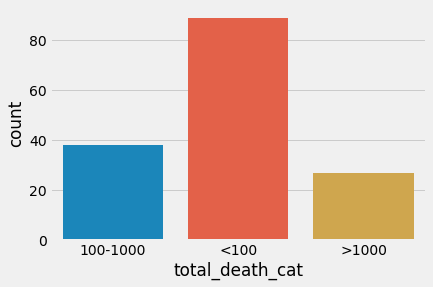

In [130]:
sns.countplot(death_lr['total_death_cat'], label='Count')

The number of countries with less than 100 death cases is the highest.

In [131]:
#Dividing data into training and testing sets
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(death_lr.drop(['total_death_cat'], axis=1), death_lr['total_death_cat'], stratify=death_lr['total_death_cat'], random_state=12)

In [132]:
# Model Fitting 
lr_death=LogisticRegression().fit(X_train_death,y_train_death)
y_pred_train_death = lr_death.predict(X_train_death)
y_pred_test_death = lr_death.predict(X_test_death)

In [134]:
#Evaluation fot Training Model
print('Classification Report of training set is: \n', classification_report(y_train_death,y_pred_train_death))

Classification Report of training set is: 
               precision    recall  f1-score   support

    100-1000       0.46      0.21      0.29        28
        <100       0.67      0.90      0.76        67
       >1000       0.42      0.25      0.31        20

    accuracy                           0.62       115
   macro avg       0.51      0.45      0.46       115
weighted avg       0.57      0.62      0.57       115



In the training set, MLR classified countries with less than 100 death cases correctly than countries with higher death number. The accuracy score is 0.62.

In [135]:
#Evaluation fot Testing Model
print('Classification Report of testing set is: \n', classification_report(y_test_death,y_pred_test_death))

Classification Report of training set is: 
               precision    recall  f1-score   support

    100-1000       0.00      0.00      0.00        10
        <100       0.62      0.91      0.74        22
       >1000       0.40      0.29      0.33         7

    accuracy                           0.56        39
   macro avg       0.34      0.40      0.36        39
weighted avg       0.42      0.56      0.48        39



In the testing dataset, MLR classified countries with less than 100 death cases correctly than countries with higher death number. The accuracy score is 0.56. Our model is not overfitted and it is good enough to run in unseen data.

***MNB Classifier Model For Total Death Cases

In [60]:
from sklearn.naive_bayes import MultinomialNB
clf_mnb_death=MultinomialNB()

In [136]:
#Evaluation fot Training Model
clf_mnb_death.fit(X_train_death,y_train_death)
y_pred_train_death = clf_mnb_death.predict(X_train_death)
print('Classification Report of training set is: \n', classification_report(y_train_death,y_pred_train_death))

Classification Report of training set is: 
               precision    recall  f1-score   support

    100-1000       0.46      0.43      0.44        28
        <100       0.70      0.87      0.77        67
       >1000       0.33      0.10      0.15        20

    accuracy                           0.63       115
   macro avg       0.50      0.46      0.46       115
weighted avg       0.58      0.63      0.59       115



In [62]:
#Evaluation fot Testing Model
y_pred_test_death= clf_mnb_death.predict(X_test_death)
print('Classification Report of testing set is: \n', classification_report(y_test_death,y_pred_test_death))

Classification Report of training set is: 
               precision    recall  f1-score   support

    100-1000       0.00      0.00      0.00        10
        <100       0.56      0.82      0.67        22
       >1000       0.50      0.14      0.22         7

    accuracy                           0.49        39
   macro avg       0.35      0.32      0.30        39
weighted avg       0.41      0.49      0.42        39



**Decision Tree Classifier Model for Total death Cases**

In [63]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# Data pre-processing and preparation
# Firstly, we need to convert the data from being categorical to being numerical
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
enc_X = OrdinalEncoder()
enc_y = LabelEncoder()

# The first attribute is the target, while the rest attributes are the features
X = death_lr[['eld_rate','cdr_2018_per1000','Gdp_percapita']]
y = enc_y.fit_transform(death_lr['total_death_cat'])

X_train_dt_death, X_test_dt_death, y_train_dt_death, y_test_dt_death = train_test_split(X, y, random_state=42, test_size=0.3)

In [64]:
print("x_train_death.shape: ", X_train_dt_death.shape)
print("y_train_death.shape: ", y_train_dt_death.shape)
print("x_test_death.shape: ", X_test_dt_death.shape)
print("y_test_death.shape: ", y_test_dt_death.shape)

x_train_death.shape:  (107, 3)
y_train_death.shape:  (107,)
x_test_death.shape:  (47, 3)
y_test_death.shape:  (47,)


In [65]:
#DT Classifier model fitting
clf_dt_death = DecisionTreeClassifier(random_state=42)
clf_dt_death.fit(X_train_dt_death, y_train_dt_death)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

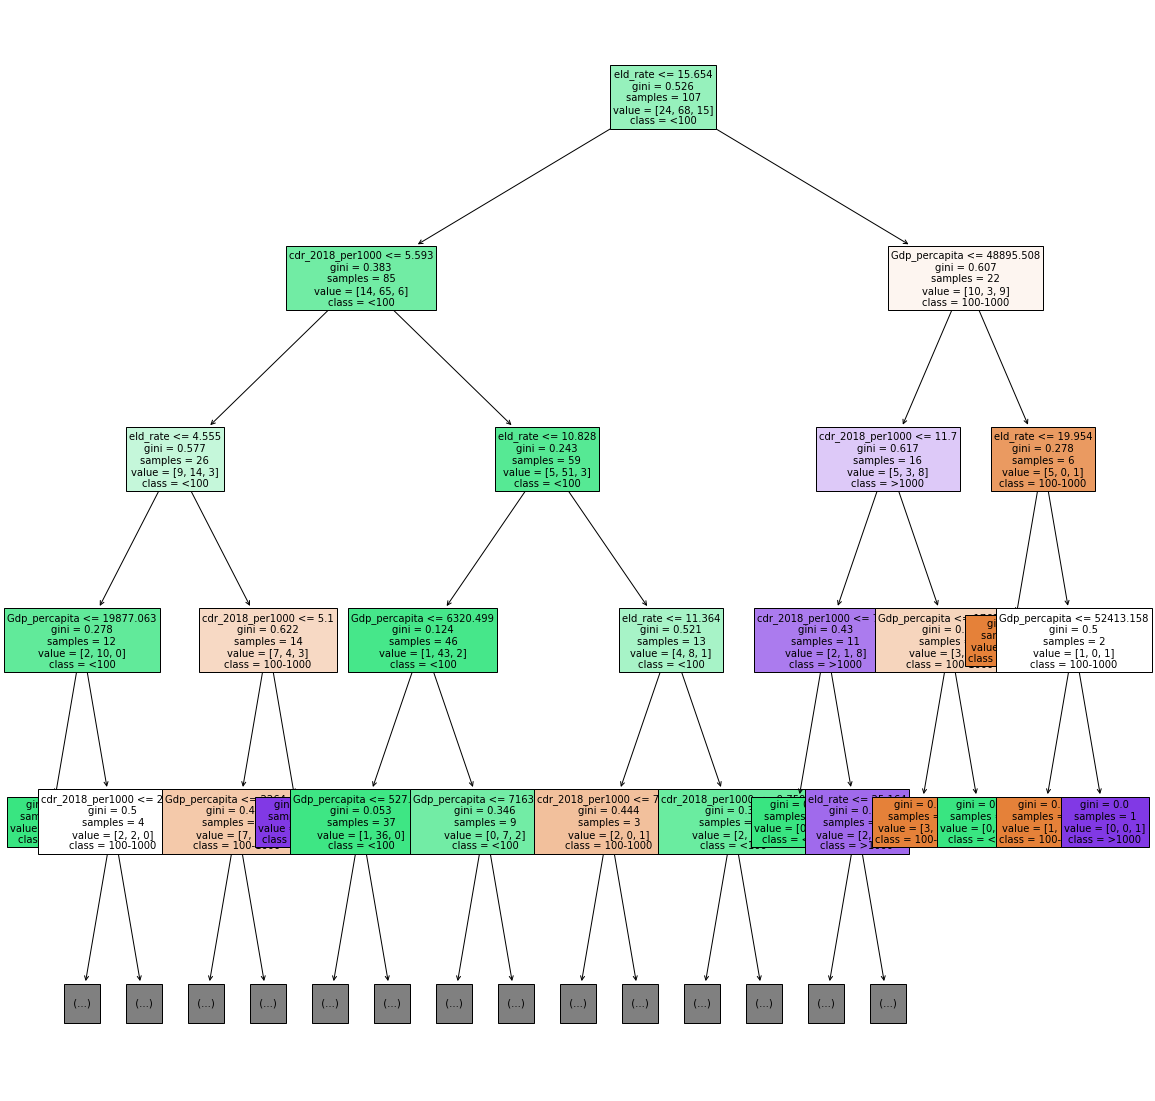

In [66]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf_dt_death, max_depth=4, filled=True, fontsize=10, 
               feature_names=death_lr.columns[1:], class_names=enc_y.classes_)
plt.show()

In [67]:
# Evaluate the trained model with the testing data
y_pred_test_dt_death = clf_dt_death.predict(X_test_dt_death)

# The prediction accuracy
print('Classification Report of testing set is: \n', classification_report(y_test_dt_death,y_pred_test_dt_death))


Classification Report of testing set is: 
               precision    recall  f1-score   support

           0       0.33      0.21      0.26        14
           1       0.53      0.76      0.63        21
           2       0.25      0.17      0.20        12

    accuracy                           0.45        47
   macro avg       0.37      0.38      0.36        47
weighted avg       0.40      0.45      0.41        47



# Model Specification (ARIMA)


In [68]:
#taking US data series
covid_cases_us=covid_cases.loc['US']
covid_cases_us.T
covid_cases_us=covid_cases_us.reset_index(inplace=False)
covid_cases_us= covid_cases_us.rename(columns={'index':'Date','US':'total_cases_us'})
covid_cases_us=covid_cases_us.set_index('Date')
covid_cases_us.head()

,total_cases_us
Date,
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5


In [69]:
round(covid_cases_us.describe(),2)

,total_cases_us
count,139.00
mean,582122.72
std,677761.31
min,1.00
25%,54.00
50%,188172.00
75%,1192363.00
max,1960897.00


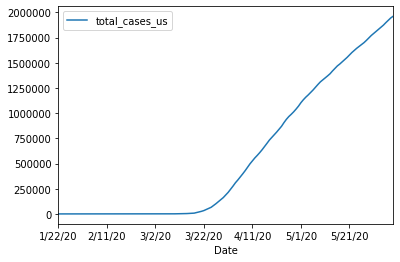

In [70]:
covid_cases_us.plot()

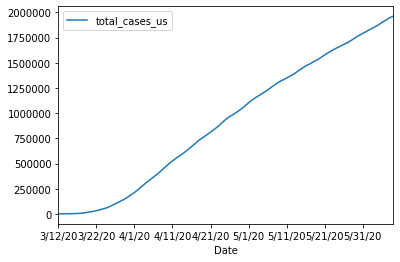

In [71]:
#smooting the graph by dropping initial values
covid_cases_mod= covid_cases_us.drop(covid_cases_us.index[range(0, 50)])
covid_cases_mod.plot()

The plot is smooth.

In [72]:
#Creating baseline model by shift method
covid_cases_mod_base=pd.concat([covid_cases_mod,covid_cases_mod.shift(1)],axis=1)
covid_cases_mod_base

,total_cases_us,total_cases_us
Date,,
3/12/20,1667,NaN
3/13/20,2181,1667.0
3/14/20,2729,2181.0
3/15/20,3536,2729.0
3/16/20,4661,3536.0
...,...,...
6/4/20,1872660,1851520.0
6/5/20,1897380,1872660.0
6/6/20,1920061,1897380.0


In [73]:
covid_cases_mod_base.columns=['actual_cases','shifted_cases']
covid_cases_mod_base.dropna(inplace=True)
covid_cases_mod_base

,actual_cases,shifted_cases
Date,,
3/13/20,2181,1667.0
3/14/20,2729,2181.0
3/15/20,3536,2729.0
3/16/20,4661,3536.0
3/17/20,6437,4661.0
...,...,...
6/4/20,1872660,1851520.0
6/5/20,1897380,1872660.0
6/6/20,1920061,1897380.0


## ARIMA model
#Parameters(p,d,q)
#p=auto regressive, q=moving averages, d=difference
#Eg: (2,0,0): Auto regessive model
#Eg: (0,0,2): Moving average model
#Eg: (2,2,2): ARIMA model


**Determining stationarity with an augmented Dickey-Fuller test**

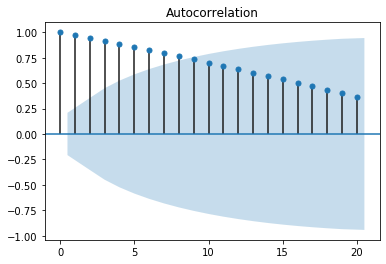

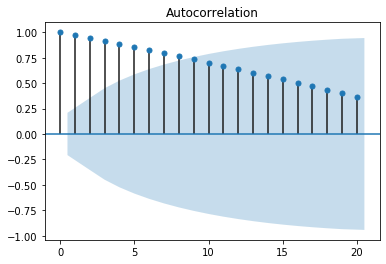

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF(Auto Correlation Function) Plots
plot_acf(covid_cases_mod)
#so q=9

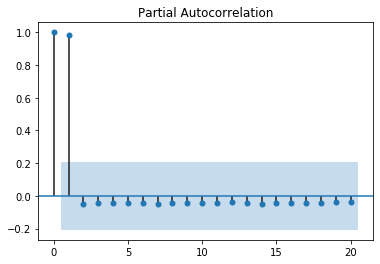

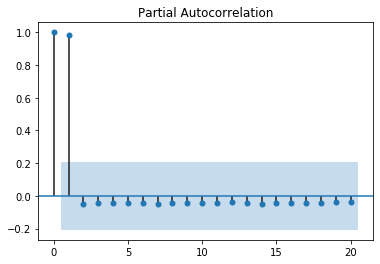

In [75]:
#PACF(Partial Auto Correlation Function) Plots
plot_pacf(covid_cases_mod)
#so p=2

In [76]:
covid_cases_mod.shape

(89, 1)

In [77]:
from statsmodels.tsa.arima_model import ARIMA 
covid_cases_mod_train=covid_cases_mod[0:50]
covid_cases_mod_test=covid_cases_mod[51:88]
covid_arima1=ARIMA(covid_cases_mod_train,order=(3,1,2)) #p=9 is not acceptable so 3 is taken
covid_arima1_fit=covid_arima1.fit()
covid_arima1_fit.aic

C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Acer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



932.827487930109

In [78]:
#ARIMA model summary
print(covid_arima1_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.total_cases_us   No. Observations:                   49
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -459.414
Method:                       css-mle   S.D. of innovations           2686.370
Date:                Tue, 09 Jun 2020   AIC                            932.827
Time:                        17:14:12   BIC                            946.070
Sample:                    03-13-2020   HQIC                           937.852
                         - 04-30-2020                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.179e+04   1.13e+04      1.932      0.060    -315.512    4.39e+04
ar.L1.D.total_cases_us     0.5869      0.124      4.726      0.000       0.343       0.830
ar.L

In [79]:
covid_arima1_forecast=covid_arima1_fit.forecast(steps=37)[0]

In [80]:
#mean_squared error of testing model
np.sqrt(mean_squared_error(covid_cases_mod_test,covid_arima1_forecast))

62753.0871538721

In [81]:
#mean_squared error of baseline model
np.sqrt(mean_squared_error(covid_cases_mod_base.actual_cases,covid_cases_mod_base.shifted_cases))

23855.72903127541

Baseline model is much better than ARIMA model when it comes to prediction because mean squared error in baseline model is much lesser than that of ARIMA model.